In [34]:
OUTPUT_PATH = "./out/"

In [35]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv("./data_NASA-TLX.csv")

df["Avg"] = df.apply(lambda x: (x.Mental + x.Physical + x.Temporal + x.Performance + x.Effort + x.Frustraion)/6-1, axis= 1)
df["IsPointer"] = True
df.loc[(df.PId % 2 == 1) , "IsPointer"] = False

In [52]:
dfR = df[["PId", "Avg", "IsPointer", "Round"]].groupby(["PId", "Round", "IsPointer"]).mean().reset_index()
dfR.to_csv("%sR_NASA.csv" % OUTPUT_PATH, index=None)
dfR.head()

,PId,Round,IsPointer,Avg
0,1,1,False,7.333333
1,1,2,False,9.166667
2,1,3,False,9.666667
3,1,4,False,9.666667
4,2,1,True,3.500000


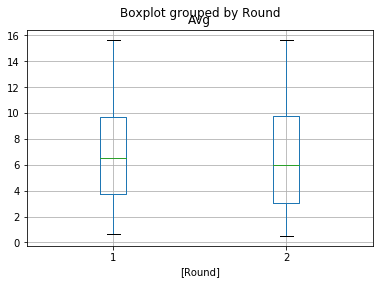

In [37]:
dfR.boxplot("Avg", by=[ "Round"])

In [38]:
df["Task"] = "Apple"
df.loc[(df.Round == 1) | (df.Round == 2), "Task"] = "Validation"
df.loc[(df.Round == 3), "Round"] = 1
df.loc[(df.Round == 4), "Round"] = 2

In [39]:
df.groupby("Round").mean().Avg

Round
1    6.833333
2    6.559028
Name: Avg, dtype: float64

In [40]:
df.groupby(["Task", "Round"]).Avg.describe().round(1)

count  mean  std  min  25%  50%   75%   max
Task       Round                                             
Apple      1       24.0   7.6  4.1  0.8  4.2  8.8  10.4  15.7
           2       24.0   7.5  4.4  0.8  4.2  7.2  11.3  15.7
Validation 1       24.0   6.0  3.1  0.7  3.5  4.8   8.2  13.2
           2       24.0   5.6  3.8  0.5  2.5  4.8   8.5  12.7

In [41]:
df.groupby("Task").Avg.describe().round(1)

,count,mean,std,min,25%,50%,75%,max
Task,,,,,,,,
Apple,48.0,7.6,4.2,0.8,4.2,7.4,11.2,15.7
Validation,48.0,5.8,3.4,0.5,3.3,4.8,8.4,13.2


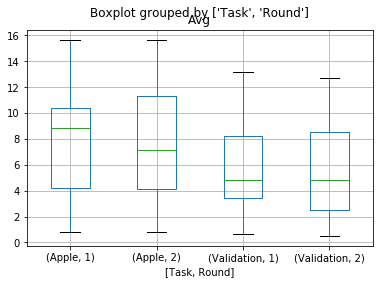

In [42]:
df.boxplot("Avg", by=["Task", "Round"])